# Data Science 207 Final Project: GTZAN Music Genre Classification

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Set the path to import GTZAN data

In [2]:
import os
general_path = '/Users/hannahgracesmith/Desktop/DS207_final_project/Data'

### Data Cleaning and Exploration

In [3]:
# Available genres
genres = list(os.listdir(f'{general_path}/genres_original/'))
genres.remove('.DS_Store') # Shows up automatically so must remove after
print(genres)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


#### Features Data Frame

In [4]:
# Import the available features for the 3 second clips
features_df = pd.read_csv("/Users/hannahgracesmith/Desktop/DS207_final_project/Data/features_3_sec.csv")

In [34]:
# Overview
features_df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [35]:
# See distributions of available data
features_df.label.value_counts() # Data is distributed very evenly

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

### Visualizing the audio files using Librosa

Audio File: [-0.006073    0.0144043   0.04669189 ... -0.00701904 -0.01977539
 -0.02853394]


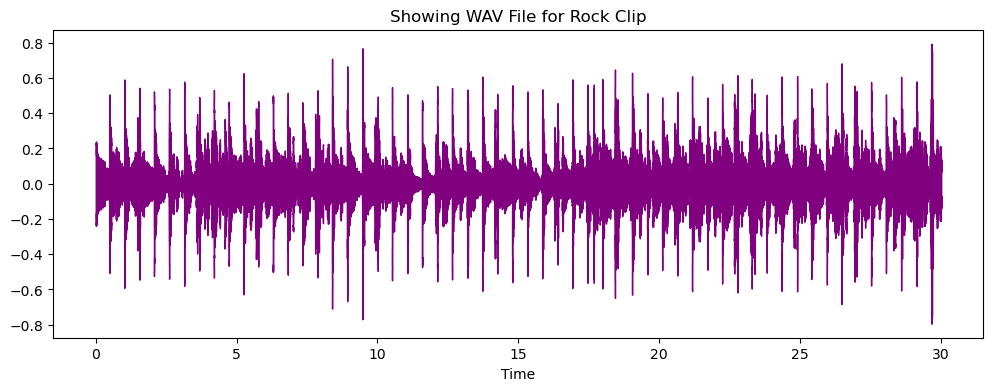

In [52]:
# Explore visual of WAV file
audio = "/Users/hannahgracesmith/Desktop/DS207_final_project/Data/genres_original/rock/rock.00012.wav"

# Load the audio
data, sr = librosa.load(audio)

# Print the array
print('Audio File:', data)

# Plot
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Blue")
plt.title('Showing WAV File for Rock Clip')
plt.show()

### Some notes from ChatGPT about determining n_fft and hop_length: <br>
1. n_fft (FFT Window Size):
- Trade-off: A smaller n_fft provides better time resolution but lower frequency resolution, while a larger n_fft provides better frequency resolution but lower time resolution.
- Typical values: Common values for n_fft range from 256 to 2048, depending on the specific analysis. You might start with values like 512 or 1024 and adjust from there.
- Rule of thumb: Choose n_fft as a power of 2 for efficiency in FFT calculations. For example, 512 or 1024 is a good choice.

2. hop_length (Number of Frames between Columns):
- Trade-off: A smaller hop_length provides a more densely sampled spectrogram with better time resolution but potentially more columns (higher computational cost). A larger hop_length reduces time resolution but can be computationally more efficient.
- Typical values: Common values for hop_length often range from 128 to 512. You can start with a value like 256, but it can vary depending on your specific use case.
- Rule of thumb: A hop_length that's roughly half of n_fft is a common starting point. For example, if n_fft is 512, a hop_length of 256 might work well.

3. Experimentation and Analysis:
- The choice of n_fft and hop_length depends on the characteristics of your audio data, your specific analysis goals, and the trade-offs between time and frequency resolution.
- Experiment with different values to see how they impact your results. Visualize the resulting spectrogram and listen to the audio to evaluate the quality of the analysis.
- Consider whether you want to emphasize time-domain or frequency-domain features in your analysis. Smaller n_fft and hop_length values emphasize temporal changes, while larger values emphasize frequency detail.

In practice, it's often necessary to fine-tune these parameters based on the specific requirements of your project and the characteristics of your audio data. You can also use techniques like auto-tuning or feature extraction to help you choose the best parameters for your analysis.

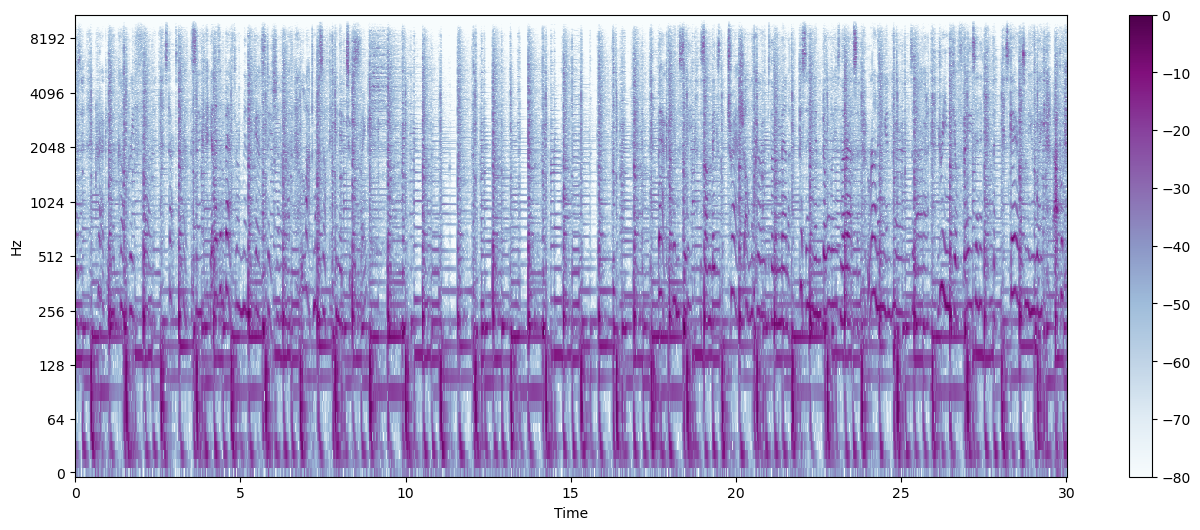

In [55]:
# Explore the spectogram
# See above markdown for research on determining n_fft and hop_length
n_fft = 2048
hop_length = 512 

# Short-time Fourier transform
stft_data = np.abs(librosa.stft(data, n_fft = n_fft, hop_length = hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram
db_scaled_spectogram = librosa.amplitude_to_db(stft_data, ref = np.max)

# Plot
plt.figure(figsize = (16, 6))
librosa.display.specshow(db_scaled_spectogram, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'Blues')
plt.colorbar()

<AxesSubplot: title={'center': 'Correlation for All Feature Variables'}>

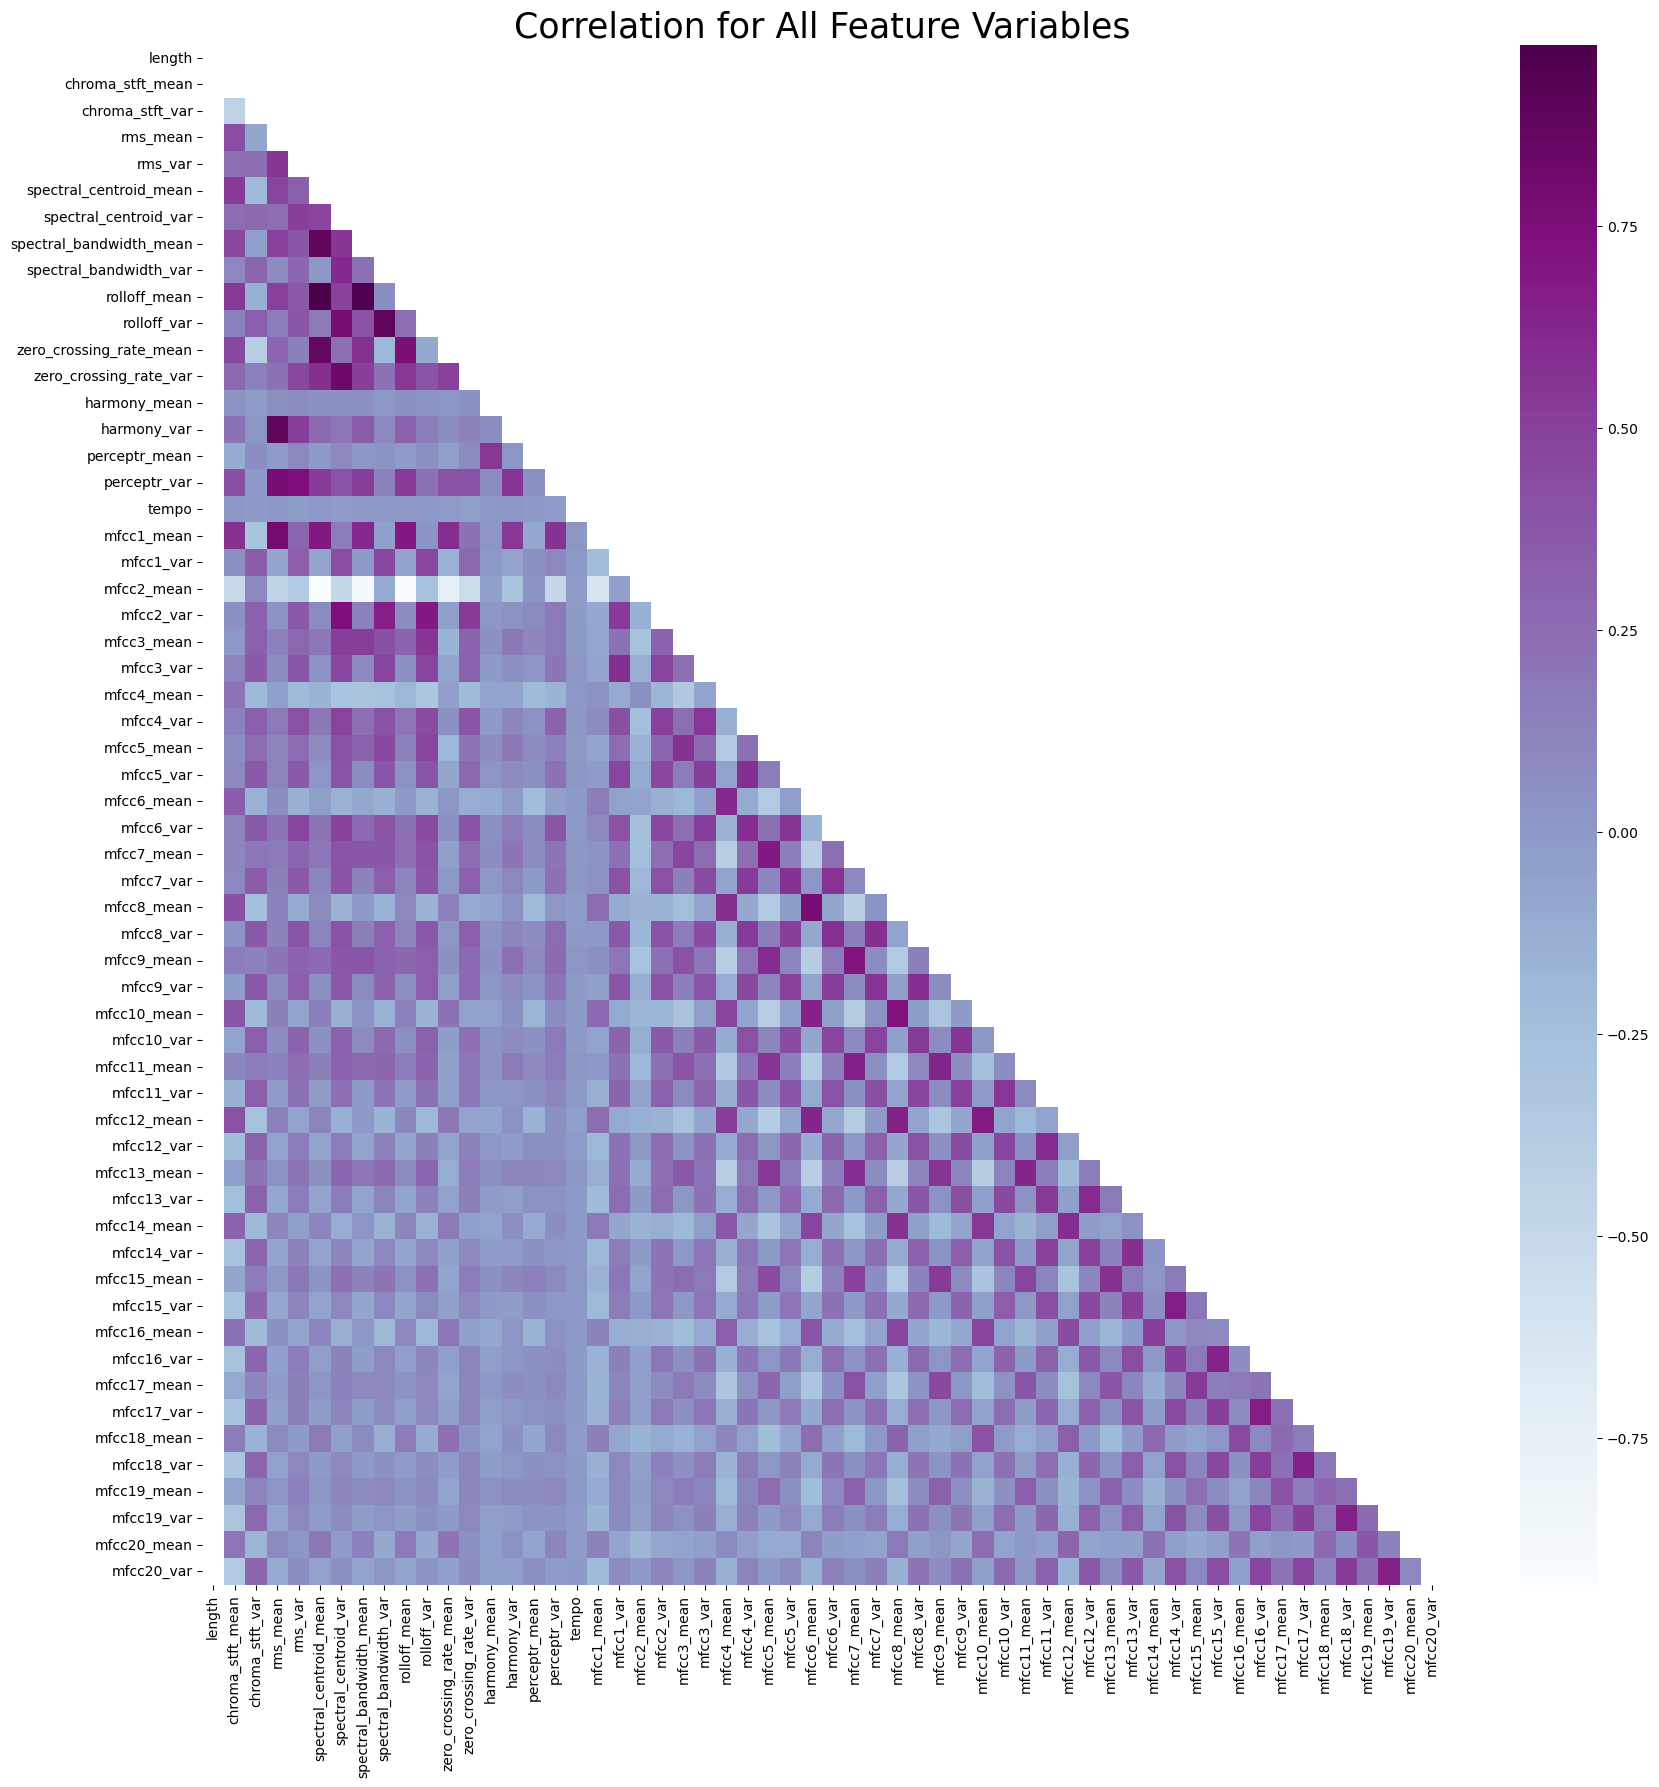

In [67]:
# Looking at correlation
corr = features_df.corr()

# Plot
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
plt.title('Correlation for All Feature Variables', fontsize = 25)
sns.heatmap(corr, mask=mask, cmap="Blues")

Text(0.5, 1.0, 'Correlation for Mean Variables')

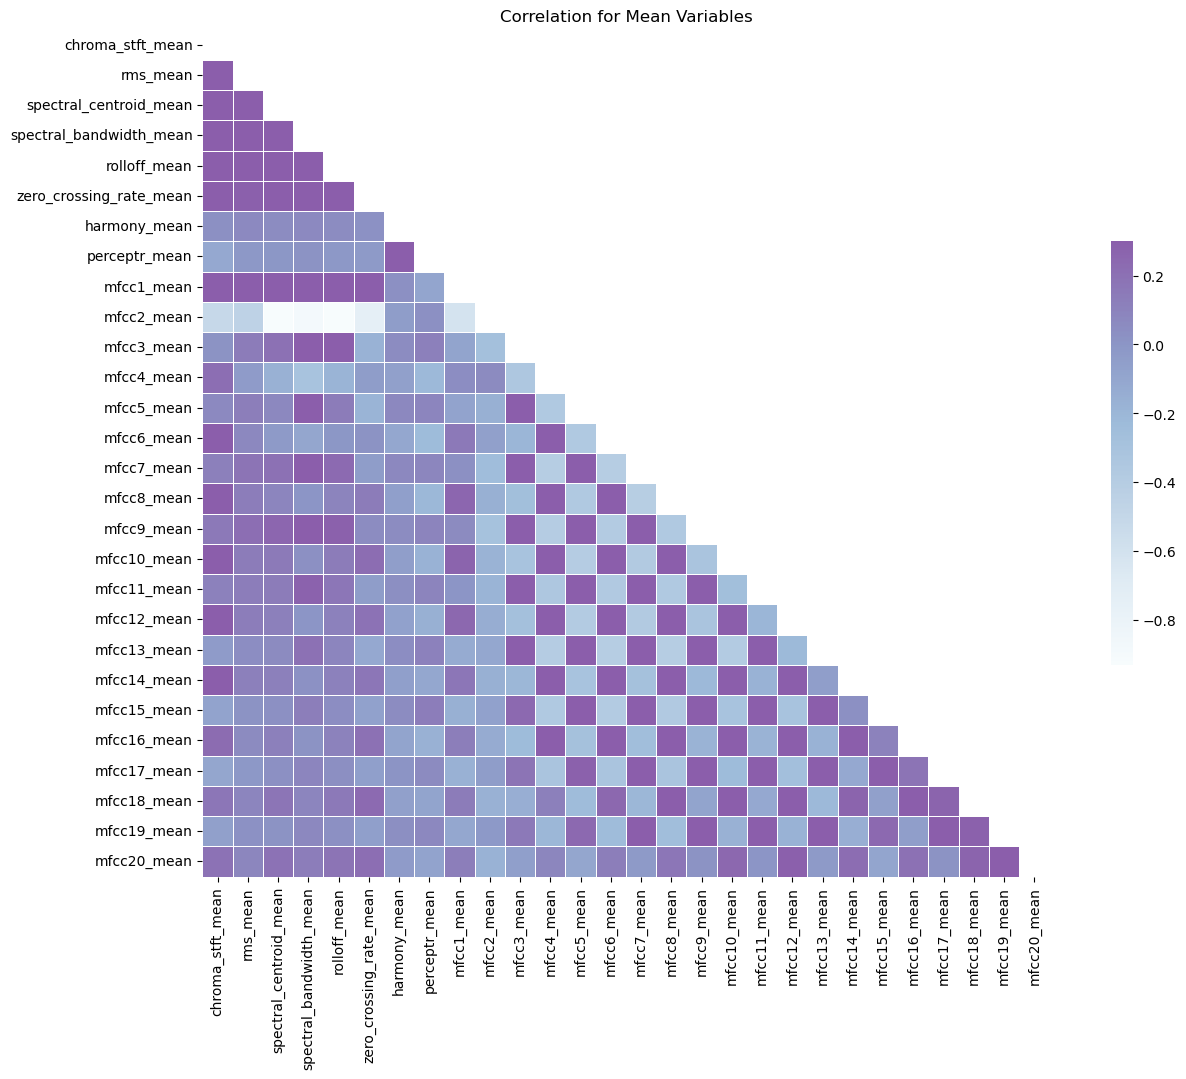

In [69]:
# Correlation for mean features
spike_cols = [col for col in features_df.columns if 'mean' in col]
corr = features_df[spike_cols].corr()

# Mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Plot
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation for Mean Variables')

Note that mfcc2_mean is highly negatively correlated with several other variables

## GTZAN Machine Learning Models

### Import libraries

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Preprocessing

In [12]:
# Labels
data = features_df.iloc[0:, 1:] # We don't need the file names
y = data['label']
X = data.loc[:, data.columns != 'label']

#### Normalize

In [72]:
# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### Split (80/20)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Evaluation

In [79]:
def calc_accuracy(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Accuracy
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Baselines

In [80]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
calc_accuracy(lg, "Logistic Regression")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
calc_accuracy(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
calc_accuracy(rforest, "Random Forest")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
calc_accuracy(nn, "Neural Nets")

Accuracy Logistic Regression : 0.7012 

Accuracy KNN : 0.83133 

Accuracy Random Forest : 0.81682 

Accuracy Neural Nets : 0.67768 



In [81]:
# Plot the confusion matrix
def plot_confusion_matrix(model):
    preds = model.predict(X_test)
    confusion = confusion_matrix(y_test, preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

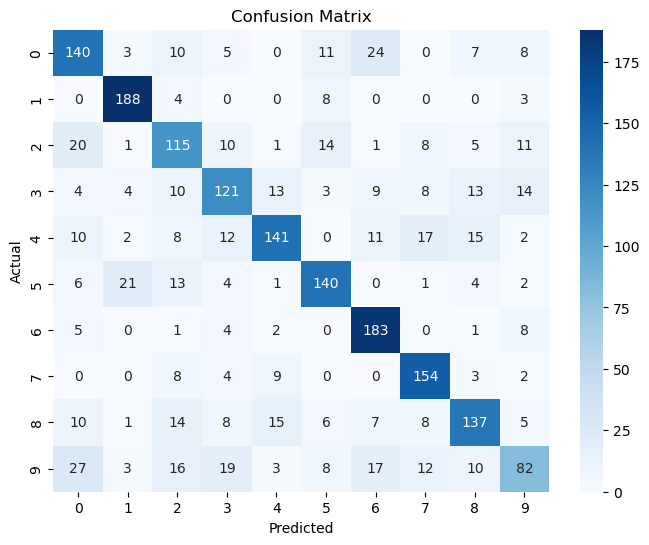

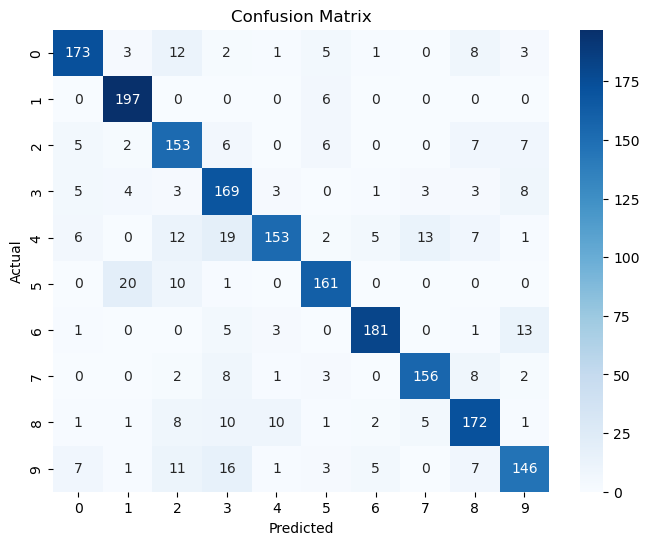

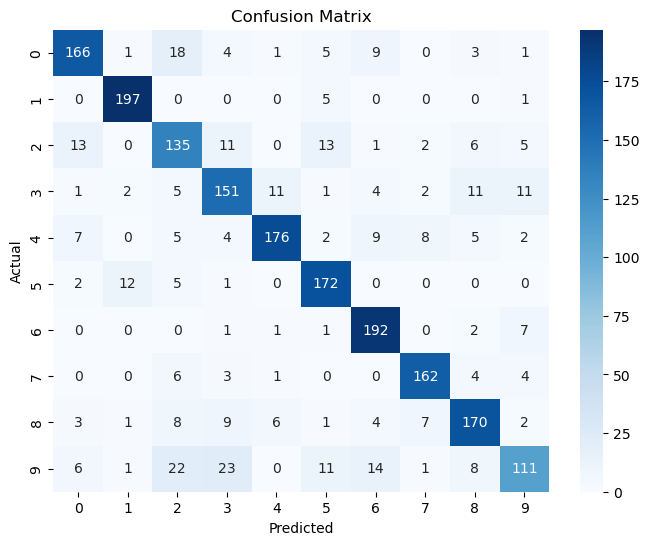

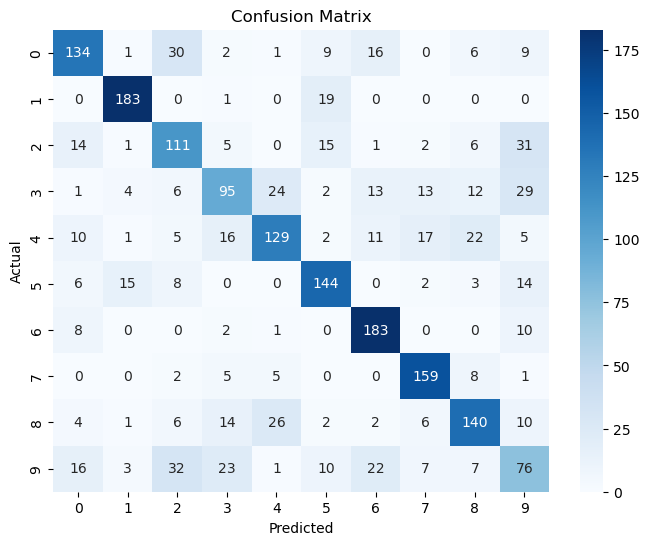

In [82]:
# Logistic Regression
plot_confusion_matrix(lg)

# KNN
plot_confusion_matrix(knn)

# Random Forest
plot_confusion_matrix(rforest)

# Neural Nets
plot_confusion_matrix(nn)

In [95]:
# Precision and Recall for Evaluation
def calculate_precision_recall(model, X, y, title='Default'):
    # Make predictions using the model
    y_pred = model.predict(X)
    
    # Calculate precision and recall
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    
    print(title)
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}\n')

# Look into 'macro', 'micro' and 'weighted' options

In [96]:
# Logistic Regression
calculate_precision_recall(lg, X_test, y_test, "Logistic Regression")

# KNN
calculate_precision_recall(knn, X_test, y_test, "KNN")

# Random Forest
calculate_precision_recall(rforest, X_test, y_test, "Random Forest")

# Neural Nets
calculate_precision_recall(nn, X_test, y_test, "Neural Nets")

Logistic Regression
Precision: 0.69653
Recall: 0.70196

KNN
Precision: 0.83532
Recall: 0.83246

Random Forest
Precision: 0.81617
Recall: 0.81666

Neural Nets
Precision: 0.67138
Recall: 0.67913



## Machine Learning on the Spectograms

### Import Library and Data

In [4]:
# Import the libraries for images
from PIL import Image
import io
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

In [ ]:
# Directory
root_dir = '/Users/hannahgracesmith/Desktop/DS207_final_project/Data/images_original'

# Import the data
image_data = []
labels = []

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(folder_path, image_file)
                image = Image.open(image_path)
                #image = image.resize((width, height))  # Resize
                image_array = np.array(image)
                image_data.append(image_array)
                labels.append(folder)

### Prepare the Data

In [54]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(np.array(image_data).astype('uint8'), labels, test_size=0.2)

In [55]:
# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create and fit the label encoder
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

label_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

# Shuffle the training data
np.random.seed(0)
indices = np.arange(X_train.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train = X_train[shuffled_indices]
Y_train = Y_train[shuffled_indices]

In [56]:
print(X_train)

[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1

### View Images

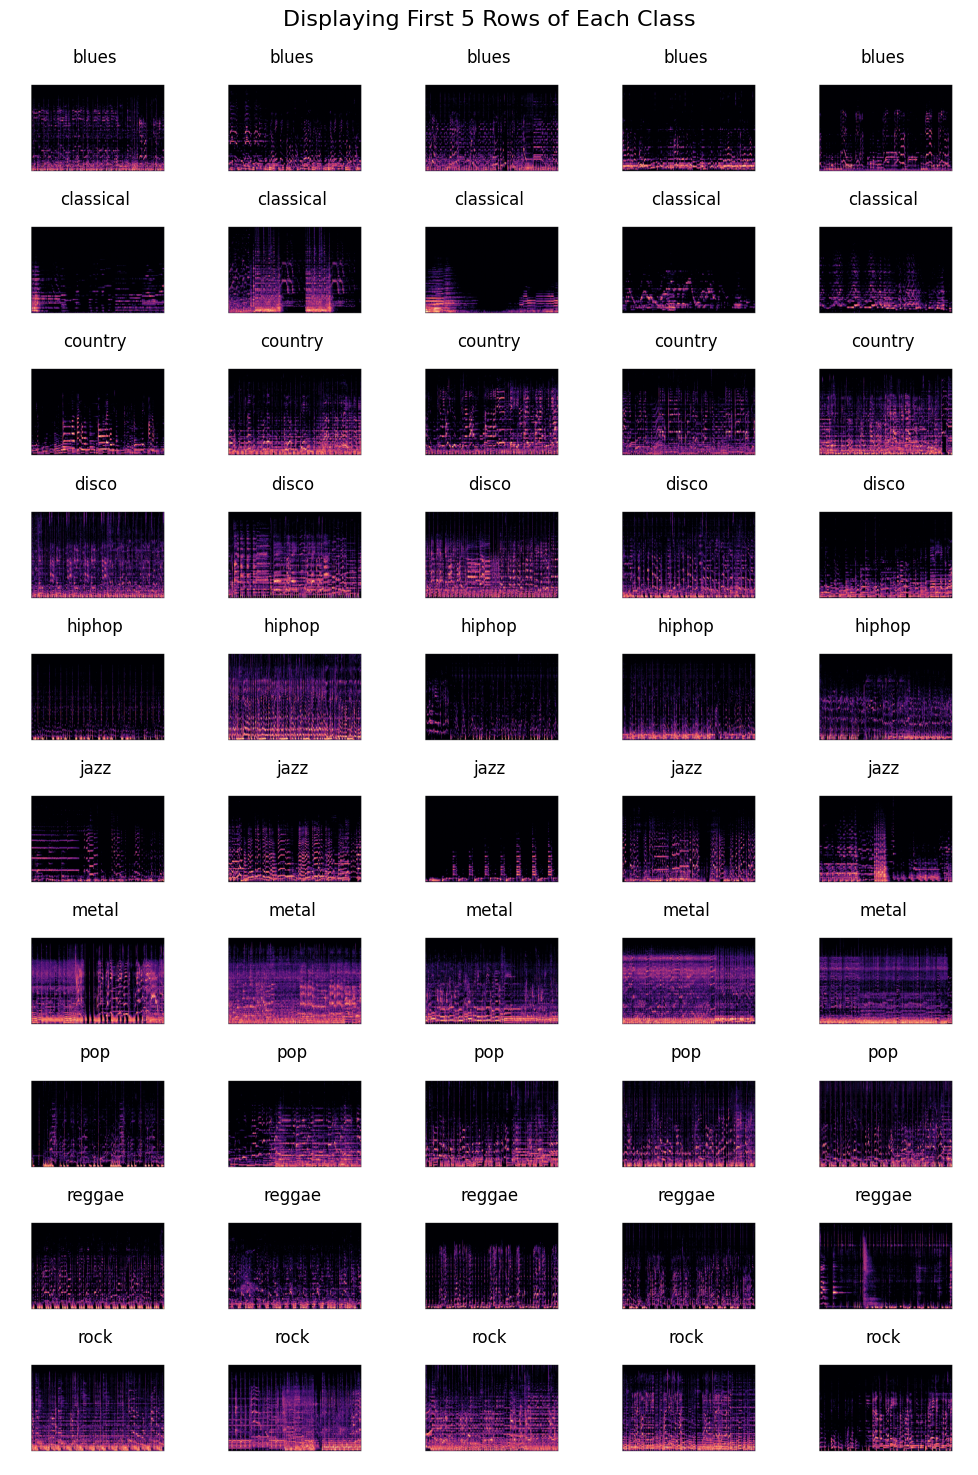

In [9]:
# Set nrows and ncols
nrows = 10
ncols = 5

# Create subplot
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

# Title label
fig.suptitle("Displaying First 5 Rows of Each Class\n", fontsize=16)

# Loop for displaying each
# Create a figure with subplots. This returns a list of object handles in axs
# which we can use to populate the plots.
for j in range(nrows):
    for i in range(ncols):
        image = X_train[Y_train == j][i]
        label = Y_train[Y_train == j][i]
        label_name = label_names[label]
        axs[j, i].set_title(label_name, fontsize=12)        
        axs[j, i].imshow(image)
        axs[j, i].axis('off')

# Formatting and display
plt.tight_layout()
plt.show()

### Tree

In [32]:
from sklearn import tree

# Reshape for tree
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_flattened, Y_train)

DecisionTreeClassifier()

In [34]:
# Reshape for tree
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [36]:
y_pred = clf.predict(X_test_flattened)
print(accuracy_score(Y_test, y_pred))

0.265


Slightly better than guessing...

## 2D CNN

Source for walkthrough and code: https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

### Preprocessing

In [64]:
IMAGE_SIZE = (288, 432)
CONTRAST_FACTOR = 3
DELTA = 0.3

### image transformation on training and test data ###
###################################################################
# image resize
X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

### image augmentation on training data ###
###########################################
# adjust brightness
X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

# adjust contrast
X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

# random flip
X_train_augm = tf.image.random_flip_left_right(X_train_augm)

# concatenate original X_train and augmented X_train data
X_train = tf.concat([X_train, X_train_augm],axis=0)

# concatenate Y_train (note the label is preserved)
Y_train_augm = Y_train
Y_train = tf.concat([Y_train, Y_train_augm],axis=0)

# shuffle X_train and Y_train, i.e., shuffle two tensors in the same order
shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
X_train = tf.gather(X_train, shuffle)
Y_train = tf.gather(Y_train, shuffle).numpy() #also transforms Y_train to numpy array

In [65]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {Y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {Y_test.shape}")

X_train shape (1598, 288, 432, 4)
y_train shape (1598,)
X_test shape (200, 288, 432, 4)
y_test shape (200,)


Print training and testing data examples:


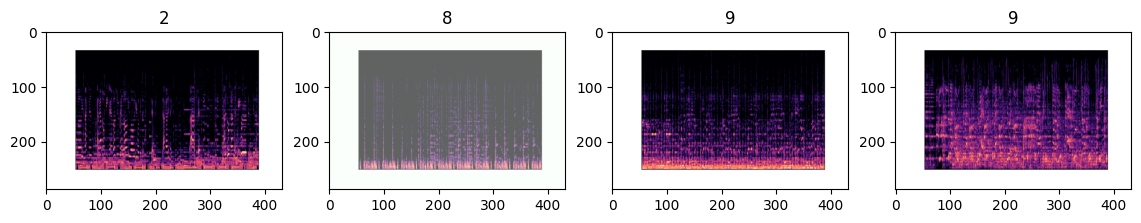

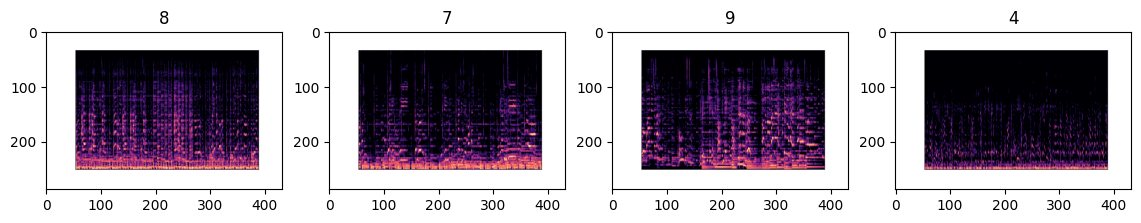

In [12]:
# Check
# print taining data
print('Print training and testing data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=Y_train[i])
    
# print test data
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_test[i]))
    axs[i].set(title=Y_test[i])

### Build the model

#### Model 1
Model isn't generalizing well--signs of overfitting with the differences between training accuracy and validation accuracy. Seems that adjusting the learning rate, pool size, epochs helped a lot with val accuracy. Batch normalization also helped. Got to around 25.5% accuracy.

Things I worked on to improve accuracy:
- Transformations (contrast, brightness, flip) -- improved
- Changing number of neurons (assisted with time for training)
- Adjusting learning rate (lower improved) --> too high was preventing convergence
- Adjusting optimizer
- Adding batch normalization (great improvement)
- Optimizer (tried with SGD and found it has a slightly better accuracy)
- data augmentation did not help
- more epochs didn't make substantial difference
- increasing pool size helped
- decreasing dropout rate helped (0.3)
- More data = better!

In [167]:
k_size = (5,5)
s_size = (2,2)
p_size = (3,3)

model = tf.keras.Sequential()

# add first convolution layer to the model
model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size,
    name='pool_1'))

# add second convolutional layer
model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=k_size,
    strides=s_size,
    padding='same',
    name='conv_2',
    activation='relu'))

# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(tf.keras.layers.MaxPool2D(
    pool_size=p_size, name='pool_2'))

# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(
    units=512,
    name='fc_1', 
    activation='relu'))

# add batch normalization
model.add(tf.keras.layers.BatchNormalization())  # Add Batch Normalization

# add dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.3))

# add the last fully connected layer
# set units=10 for 10 classes, and use 'softmax' activation for multi-class classification
model.add(tf.keras.layers.Dense(
    units=10,
    name='fc_2',
    activation='softmax'))

# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None, 288, 432, 4))
model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 144, 216, 32)      3232      
                                                                 
 pool_1 (MaxPooling2D)       (None, 48, 72, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 24, 36, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 12, 64)         0         
                                                                 
 flatten_28 (Flatten)        (None, 6144)              0         
                                                                 
 fc_1 (Dense)                (None, 512)               3146240   
                                                                 
 batch_normalization_21 (Bat  (None, 512)            

In [168]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [169]:
X_train_subset = X_train[:300]
Y_train_subset = Y_train[:300]
X_test_subset = X_test[:100]
Y_test_subset = Y_test[:100]

In [172]:
# set random seed to get reproductible results 
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, Y_train,
                    epochs=30, 
                    validation_data=(X_test_subset, Y_test_subset)
)

Epoch 1/30
50/50 [==============================] - 49s 951ms/step - loss: 1.2409 - accuracy: 0.6126 - val_loss: 1.8121 - val_accuracy: 0.4300
Epoch 2/30
50/50 [==============================] - 47s 931ms/step - loss: 1.0231 - accuracy: 0.6996 - val_loss: 1.6555 - val_accuracy: 0.4400
Epoch 3/30
50/50 [==============================] - 47s 935ms/step - loss: 0.8269 - accuracy: 0.7641 - val_loss: 1.6847 - val_accuracy: 0.4300
Epoch 4/30
50/50 [==============================] - 62s 1s/step - loss: 0.6931 - accuracy: 0.8048 - val_loss: 1.4825 - val_accuracy: 0.5100
Epoch 5/30
50/50 [==============================] - 70s 1s/step - loss: 0.5581 - accuracy: 0.8711 - val_loss: 1.6564 - val_accuracy: 0.4200
Epoch 6/30
50/50 [==============================] - 67s 1s/step - loss: 0.4499 - accuracy: 0.9055 - val_loss: 1.4677 - val_accuracy: 0.5900
Epoch 7/30
50/50 [==============================] - 79s 2s/step - loss: 0.3806 - accuracy: 0.9268 - val_loss: 1.3359 - val_accuracy: 0.5100
Epoch 8/30


In [180]:
test_results = model.evaluate(X_test, Y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

7/7 [==============================] - 6s 540ms/step - loss: 1.0254 - accuracy: 0.6250

Test Acc. 62.50%


#### We will see if mel spectogram fares better

In [179]:
# Get mel spectograms and save them
wav_path = '/Users/hannahgracesmith/Desktop/DS207_final_project/Data/genres_original'
output_folder = 'mel_spectrogram_images'
hop_length = 512  # Adjust as needed

# Get a list of all genre folders in the directory
genre_folders = [f for f in os.listdir(wav_path) if os.path.isdir(os.path.join(wav_path, f))]

# Create the output folder if it doesn't exist
output_path = os.path.join(wav_path, output_folder)
os.makedirs(output_path, exist_ok=True)

# Process each genre folder
for genre_folder in genre_folders:
    genre_path = os.path.join(wav_path, genre_folder)
    
    # Get a list of all audio files in the genre folder
    file_list = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    # Process each file in the genre folder
    for file in file_list:
        # Load audio file
        file_path = os.path.join(genre_path, file)
        y, sr = librosa.load(file_path)
        
        # Trim silence
        y, _ = librosa.effects.trim(y)
        
        # Compute Mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        
        # Convert to dB scale
        S_DB = librosa.amplitude_to_db(S, ref=np.max)
        
        # Display spectrogram
        plt.figure(figsize=(16, 6))
        librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
        plt.colorbar()
        
        # Extract file name without numbers
        file_name_without_numbers = ''.join([i for i in file.split('.')[0] if not i.isdigit()])
        
        # Save the image with the genre label (excluding numbers)
        image_path = os.path.join(output_path, f"{genre_folder}_{file_name_without_numbers}.png")
        plt.savefig(image_path)
        plt.close()  # Close the current figure to free up memory

print("Spectrogram images saved in 'mel_spectrogram_images' folder.")

NoBackendError: 